In [1]:
import torch

In [2]:
def fn(x, y):
    a = torch.sin(x)
    print(a)
    b = torch.cos(y)
    print(b)
    return a + b

In [3]:
opt_fn = torch.compile(
    fn,
    backend='inductor',
    options={
        'trace.graph_diagram': True,
        'trace.enabled': True
    }
)

In [4]:
input_ = torch.randn(10_000, requires_grad=True)

In [5]:
out = opt_fn(input_, input_).sum().backward()

Writing FX graph to file: /home/nguyenhuuminh/Pytorch2Seminar/torch_compile_debug/run_2023_03_23_04_11_20_947078-pid_2961662/aot_torchinductor/model__0_forward_1.0/graph_diagram.svg


[2023-03-23 04:11:29,027] torch._inductor.debug: [WARNING] model__0_forward_1 debug trace: /home/nguyenhuuminh/Pytorch2Seminar/torch_compile_debug/run_2023_03_23_04_11_20_947078-pid_2961662/aot_torchinductor/model__0_forward_1.0


tensor([-0.7440, -0.1422, -0.3028,  ...,  0.5203, -0.9845,  0.8924],
       grad_fn=<CompiledFunctionBackward>)
Writing FX graph to file: /home/nguyenhuuminh/Pytorch2Seminar/torch_compile_debug/run_2023_03_23_04_11_20_947078-pid_2961662/aot_torchinductor/model__1_forward_3.1/graph_diagram.svg


[2023-03-23 04:11:30,893] torch._inductor.debug: [WARNING] model__1_forward_3 debug trace: /home/nguyenhuuminh/Pytorch2Seminar/torch_compile_debug/run_2023_03_23_04_11_20_947078-pid_2961662/aot_torchinductor/model__1_forward_3.1


tensor([ 0.6682,  0.9898,  0.9531,  ...,  0.8540, -0.1754,  0.4512],
       grad_fn=<CompiledFunctionBackward>)
Writing FX graph to file: /home/nguyenhuuminh/Pytorch2Seminar/torch_compile_debug/run_2023_03_23_04_11_20_947078-pid_2961662/aot_torchinductor/model__2_forward_5.2/graph_diagram.svg


[2023-03-23 04:11:32,389] torch._inductor.debug: [WARNING] model__2_forward_5 debug trace: /home/nguyenhuuminh/Pytorch2Seminar/torch_compile_debug/run_2023_03_23_04_11_20_947078-pid_2961662/aot_torchinductor/model__2_forward_5.2
[2023-03-23 04:11:32,403] torch._inductor.debug: [WARNING] model__2_backward_6 debug trace: /home/nguyenhuuminh/Pytorch2Seminar/torch_compile_debug/run_2023_03_23_04_11_20_947078-pid_2961662/aot_torchinductor/model__2_backward_6.3


Writing FX graph to file: /home/nguyenhuuminh/Pytorch2Seminar/torch_compile_debug/run_2023_03_23_04_11_20_947078-pid_2961662/aot_torchinductor/model__1_backward_7.4/graph_diagram.svg


[2023-03-23 04:11:34,007] torch._inductor.debug: [WARNING] model__1_backward_7 debug trace: /home/nguyenhuuminh/Pytorch2Seminar/torch_compile_debug/run_2023_03_23_04_11_20_947078-pid_2961662/aot_torchinductor/model__1_backward_7.4


Writing FX graph to file: /home/nguyenhuuminh/Pytorch2Seminar/torch_compile_debug/run_2023_03_23_04_11_20_947078-pid_2961662/aot_torchinductor/model__0_backward_8.5/graph_diagram.svg


[2023-03-23 04:11:35,602] torch._inductor.debug: [WARNING] model__0_backward_8 debug trace: /home/nguyenhuuminh/Pytorch2Seminar/torch_compile_debug/run_2023_03_23_04_11_20_947078-pid_2961662/aot_torchinductor/model__0_backward_8.5


In [6]:
from torch.fx import passes, symbolic_trace

In [7]:
model = symbolic_trace(fn)

Proxy(sin)
Proxy(cos)


In [8]:
g = passes.graph_drawer.FxGraphDrawer(model, 'fn')

In [9]:
with open('unoptimized_graph.svg', 'wb') as f:
    f.write(g.get_dot_graph().create_svg())

In [10]:
from IPython.display import SVG, display
def show_svg(path):
    display(SVG(path))

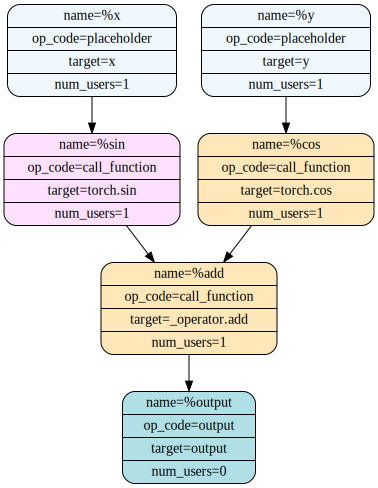

In [11]:
show_svg('unoptimized_graph.svg')

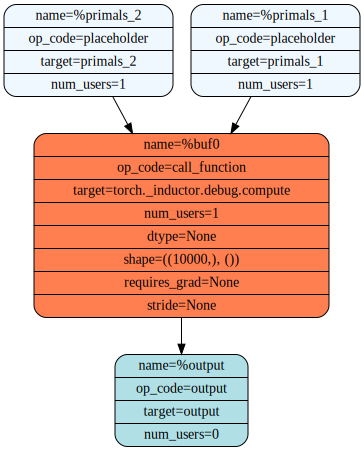

In [12]:
show_svg(
    'torch_compile_debug/' + \
    'run_2023_03_23_04_05_09_162185-pid_2819887/' + \
    'aot_torchinductor/' + \
    'model__0_forward_1.0/' + \
    'graph_diagram.svg'
)

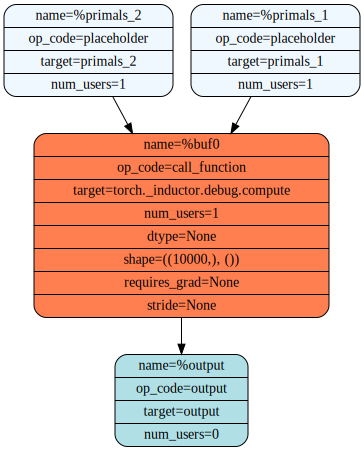

In [16]:
show_svg(
    'torch_compile_debug/' + \
    'run_2023_03_23_04_11_20_947078-pid_2961662/' + \
    'aot_torchinductor/' + \
    'model__2_forward_5.2/' + \
    'graph_diagram.svg'
)